In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Thilipan'

In [3]:
cd downloads

C:\Users\Thilipan\downloads


In [4]:
words = open("names.txt" , 'r').read().splitlines()

In [5]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {}
for key, char in enumerate(chars):
    stoi[char] = key+1
stoi['.'] = 0
itos = {}
for cha, key in stoi.items():
    itos[key] = cha


In [7]:
word_size = 3
X = []
y = []

for w in words[:5]:
    context = [0] * word_size
    for i in w + '.':
        xh = stoi[i]
        y.append(xh)
        X.append(context)
        con = []
        for co in context:
            con.append(itos[co])
        cont = ''.join(con)
        print(cont,'--->',itos[xh])
        context = context[1:] + [xh]
x = torch.tensor(X) #feature
y = torch.tensor(y) #label
            

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
x[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [9]:
g = torch.Generator().manual_seed(69)
c = torch.randn([27,2] ,generator = g) #the look up table each index has 2 dimensions and embedded

In [10]:
c

tensor([[-0.5300, -1.3035],
        [ 0.4438,  1.2221],
        [ 1.0395,  0.9608],
        [ 0.4214,  0.7452],
        [-1.8389, -1.2497],
        [-0.2485,  0.1428],
        [-1.0509,  0.3527],
        [-0.0916,  0.0341],
        [-0.8986,  0.1022],
        [-0.6627, -0.1350],
        [-0.3983, -1.7892],
        [ 1.2785,  1.3351],
        [-0.3066,  1.0382],
        [ 1.2762,  0.0419],
        [-1.2794, -1.8432],
        [ 0.8633, -1.7786],
        [-0.8080, -0.8735],
        [ 0.9367, -1.2319],
        [ 1.5287, -0.2759],
        [ 0.6394,  1.2406],
        [ 0.7299, -0.8683],
        [ 0.6726,  0.1142],
        [ 1.0251,  1.3822],
        [-0.3832,  1.4027],
        [ 1.9010, -1.1275],
        [ 0.7207, -0.2668],
        [-1.6520, -1.1392]])

In [11]:
c[[0,0,0]] #you can index with list in pt so inside c[] index[0,0,0] will give the same 

tensor([[-0.5300, -1.3035],
        [-0.5300, -1.3035],
        [-0.5300, -1.3035]])

In [12]:
c[x][:3] # like above x has int of the features and putting them in c so thats why 3 of them and 2 dimesions each cuz of c

tensor([[[-0.5300, -1.3035],
         [-0.5300, -1.3035],
         [-0.5300, -1.3035]],

        [[-0.5300, -1.3035],
         [-0.5300, -1.3035],
         [-0.2485,  0.1428]],

        [[-0.5300, -1.3035],
         [-0.2485,  0.1428],
         [ 1.2762,  0.0419]]])

In [13]:
emb = c[x] # embedding look up table
emb.shape # the 32,3,2 means 32 from x so 32 batch size will be the number of cols and for each one of the x[0,0,0] we have 2 vectors 

torch.Size([32, 3, 2])

In [14]:
emb[0]

tensor([[-0.5300, -1.3035],
        [-0.5300, -1.3035],
        [-0.5300, -1.3035]])

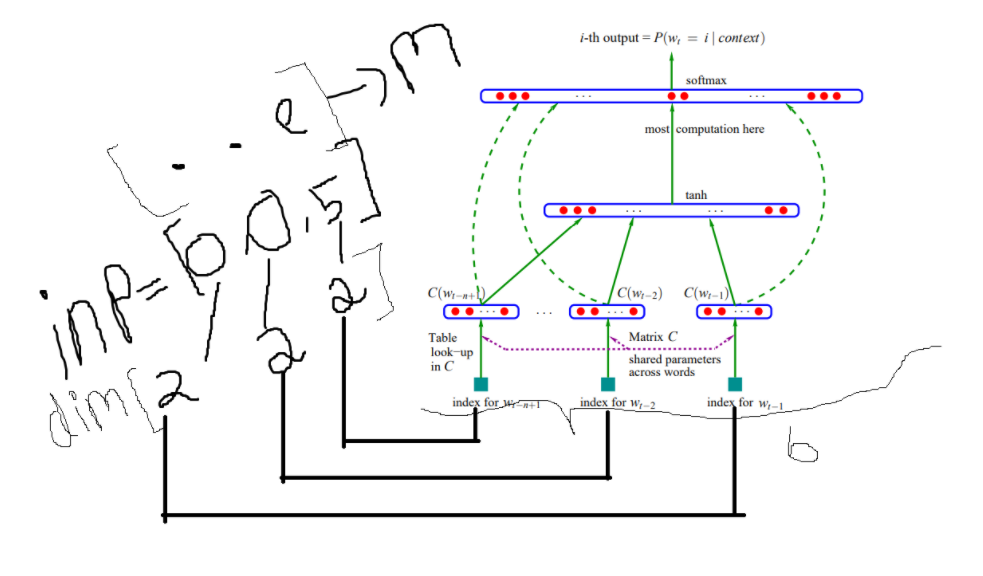

In [15]:
u = torch.arange(10)
u

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
u.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [17]:
u.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [18]:
torch.arange(18).view(2,3,3) #torch.view() => literal fucking blackmagic

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [19]:
gen = torch.Generator().manual_seed(69)
W1 = torch.randn((6, 100), generator =gen) #weights for the first hidden layer so it takes 6 inputs for each of the 100 neurons
b1 = torch.randn((100), generator = gen)
# the bias will broadcast downwards
# w1 = 6, 100
# b1 = 1, 100 this copies upwareds and element wise addition

In [20]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)#here we are turning our 32,3,2 to 32,6 cuz each euron will take 2 in input layer and we have 3 inputs
#so we do emb.view(32,6) for this example or to represent 32 we can put emb.shape[0] -> this tells us the batch size aka x.shape
#and we apply a tanh act. function to bring it between -1 to 1
h #(32,6) (6,100) => (32,100)

tensor([[-0.9502,  0.8610, -0.9997,  ...,  0.5947, -0.9061,  0.9984],
        [ 0.4337,  0.9913, -0.9999,  ...,  0.9612, -0.9735,  0.0567],
        [ 0.7132,  0.8466, -1.0000,  ...,  0.9930, -0.8616,  0.1329],
        ...,
        [-0.5469,  0.8480, -1.0000,  ...,  0.9874, -0.9961,  0.9390],
        [ 0.7217,  0.9555, -0.9997,  ...,  0.7259, -0.9863,  0.9791],
        [ 0.9992,  0.9834, -0.9940,  ...,  0.9612, -0.9897, -0.9932]])

In [21]:
#now output layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [22]:
logits = h @ W2 + b2
logits.shape # this is the 27 "raw" outputs it predicted for each of the threee inputs

torch.Size([32, 27])

In [23]:
#applying a softmax to the raw logits exp(a)/sum(exp(a))
count = logits.exp()
probs = count/count.sum(1, keepdims = True) #keepdims cuz divide each row with its own sum of rows
probs[1]

tensor([6.3166e-07, 5.5279e-03, 3.6542e-08, 1.2873e-04, 1.8867e-11, 6.2341e-13,
        1.4174e-05, 3.4313e-05, 1.1460e-06, 2.1166e-09, 3.0326e-05, 5.4916e-04,
        8.4485e-05, 8.8764e-05, 9.7561e-06, 9.6197e-01, 5.4310e-06, 1.8890e-09,
        2.3882e-08, 1.7007e-05, 1.1728e-03, 8.3277e-04, 1.3342e-11, 3.0639e-05,
        9.1498e-06, 7.2838e-08, 2.9496e-02])

In [24]:
y #the real output "labels", we index this at each of the output probs

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [25]:
#calculating loss
#we want to predict y so we will pluck out whatever the model has predicted for that index
probs[0,5], probs[1,13], probs[3,1]  #so on

(tensor(9.7823e-09), tensor(8.8764e-05), tensor(6.7954e-06))

In [26]:
probs[torch.arange(32), y]

tensor([9.7823e-09, 8.8764e-05, 3.9814e-08, 6.7954e-06, 4.9723e-06, 9.8852e-01,
        1.0878e-04, 1.4348e-09, 9.8212e-09, 3.9815e-13, 9.5522e-02, 7.3181e-11,
        1.4088e-05, 2.4196e-16, 9.4205e-01, 6.2651e-07, 1.2275e-07, 6.2180e-06,
        7.8544e-01, 1.1342e-03, 1.1938e-05, 3.2586e-06, 5.4421e-12, 9.8880e-01,
        3.1599e-09, 2.6890e-03, 6.3403e-06, 1.0470e-13, 4.7336e-09, 4.3056e-05,
        1.4852e-03, 4.0619e-13])

In [27]:
#to caclulate negative log likelihood loss
#take log for em
probs[torch.arange(32), y].log()

tensor([-1.8443e+01, -9.3295e+00, -1.7039e+01, -1.1899e+01, -1.2212e+01,
        -1.1542e-02, -9.1262e+00, -2.0362e+01, -1.8439e+01, -2.8552e+01,
        -2.3484e+00, -2.3338e+01, -1.1170e+01, -3.5958e+01, -5.9699e-02,
        -1.4283e+01, -1.5913e+01, -1.1988e+01, -2.4151e-01, -6.7818e+00,
        -1.1336e+01, -1.2634e+01, -2.5937e+01, -1.1262e-02, -1.9573e+01,
        -5.9186e+00, -1.1969e+01, -2.9888e+01, -1.9169e+01, -1.0053e+01,
        -6.5122e+00, -2.8532e+01])

In [28]:
#now take its mean
probs[torch.arange(32), y].log().mean()

tensor(-14.0321)

In [29]:
#and take the negative of it 
nll = -probs[torch.arange(emb.shape[0]), y].log().mean()
nll.item()

14.032062530517578

In [30]:
#or you can do all that and 
F.cross_entropy(logits,y).item()
#these both are thr same but this is more efficient and easy just calc loss from logits directly

14.032060623168945

In [31]:
#putting them all
gen = torch.Generator().manual_seed(694200)
W1 = torch.randn((6, 100), generator = gen, requires_grad = True) #weights for the first hidden layer so it takes 6 inputs for each of the 100 neurons
b1 = torch.randn((100), generator = gen, requires_grad = True)
W2 = torch.randn((100, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
pars = [W1, b1, W2, b2]

In [32]:
coun = 0
for p in pars:
    coun += p.nelement() #count the total number of elements in a tensor
print(f'total number of parameters : {coun}')

total number of parameters : 3427


In [33]:
for i in range(15):
    #forward pass
    emb = c[x]
    o = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) #hidden layer
    logits = o @ W2 + b2 #output layer (Raw logits)
    
    #calculating loss
    loss = F.cross_entropy(logits, y)
    print(f'loss at epoch {i} : {loss :.5f}')

    #backpropogation
    for p in pars:
        p.grad = None
    loss.backward()
    
    #updating parameters
    for p in pars:
        p.data += -0.1 * p.grad
        

loss at epoch 0 : 17.95159
loss at epoch 1 : 15.72493
loss at epoch 2 : 13.76903
loss at epoch 3 : 12.12896
loss at epoch 4 : 10.81591
loss at epoch 5 : 9.61522
loss at epoch 6 : 8.49882
loss at epoch 7 : 7.45779
loss at epoch 8 : 6.49383
loss at epoch 9 : 5.63978
loss at epoch 10 : 4.92149
loss at epoch 11 : 4.34657
loss at epoch 12 : 3.89334
loss at epoch 13 : 3.52003
loss at epoch 14 : 3.20737


The reason why the loss goes down real fast is we are overfitting this model with a small batch of 32 of 3427 parameters

In [34]:
torch.randint(5, 10,(5,4)) # torch.randint takes low, high,(size) as input
#torch.randn create a random tessor with a bell curve

tensor([[8, 6, 6, 5],
        [9, 5, 6, 9],
        [8, 8, 8, 9],
        [7, 9, 5, 8],
        [9, 7, 7, 7]])

In [35]:
'''
so instead of running the whole dataset thru the model
which might take a while to calc grad we send randomly picked
mini batches from x and y and calc grad but not so efficient but fast
'''
ix = torch.randint(0, emb.shape[0], (32,))
ix # so say we run the whole dataset thisll take a random batch

tensor([19, 23,  5, 24,  9,  5,  1, 16, 24,  3, 22, 25,  9, 22, 26, 10, 10,  4,
        28, 31, 12, 12,  7, 20,  8,  7, 12, 23, 28, 29, 27, 10])

In [36]:
#lets do for the whole batch 
x = []
y = []
context_win = 3
for i in words:
    context = [0] * context_win
    for w in i + '.':
        ix = stoi[w]
        x.append(context)
        y.append(ix)
        context = context[1:] + [ix]
x = torch.tensor(x)
y = torch.tensor(y)
x.shape

torch.Size([228146, 3])

In [37]:
#parameters
gen = torch.Generator().manual_seed(420)
c = torch.randn((27,2) , generator = gen)

In [38]:
embed = c[x]
embed.shape[0]

228146

In [39]:
#initializing weights and biases
gen = torch.Generator().manual_seed(69942)
W1 = torch.randn((6, 100), generator = gen, requires_grad = True)
b1 = torch.randn((100), generator = gen, requires_grad = True)
W2 = torch.randn((100, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
params = [W1, b1, W2, b2]

In [40]:
#calculating from a mini batch to the whole dataset
for i in range(10):
    #mini batching
    ix = torch.randint(0, embed.shape[0], (32,)) # this takes (32,0) numbers from 0 to 228146 randomly

    #forward pass
    embed = c[x[ix]] #input layer
    m = embed.view(-1,6) @ W1 + b1 #hidden layer
    h = torch.tanh(m) #act function
    logit = h @ W2 + b2
    
    #calc loss
    loss = F.cross_entropy(logit, y[ix])
    print(f'loss at iter {i} : {loss:.5f}')

    #calculating gradient
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data += -0.1 * p.grad
    

loss at iter 0 : 18.20369
loss at iter 1 : 17.03310
loss at iter 2 : 14.23975
loss at iter 3 : 13.42266
loss at iter 4 : 11.37859
loss at iter 5 : 9.98397
loss at iter 6 : 8.48637
loss at iter 7 : 8.07085
loss at iter 8 : 7.62399
loss at iter 9 : 7.84001


In [41]:
'''
embed = c[x] #input layer
m = embed.view(-1,6) @ W1 + b1 #hidden layer
h = torch.tanh(m) #act function
logi = h @ W2 + b2
losse = F.cross_entropy(logi,y)
print(loss.item())
'''

'\nembed = c[x] #input layer\nm = embed.view(-1,6) @ W1 + b1 #hidden layer\nh = torch.tanh(m) #act function\nlogi = h @ W2 + b2\nlosse = F.cross_entropy(logi,y)\nprint(loss.item())\n'

In [172]:
#train / test / valid or dev split
# 80 / 10 / 10
import random
def build(words):
    x = []
    y = []
    context_win = 3
    for i in words:
        context = [0] * context_win
        for w in i + '.':
            ix = stoi[w]
            x.append(context)
            y.append(ix)
            context = context[1:] + [ix]
    x = torch.tensor(x)
    y = torch.tensor(y)
    print(f'{x.shape},{y.shape}')
    return x, y
random.seed(6996)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
xtr, ytr = build(words[:n1]) #first 80 percent
xdev, ydev = build(words[n1:n2]) #the ten percent between 80 and 90
xte, yte = build(words[:n2]) #from 90 percent


torch.Size([182446, 3]),torch.Size([182446])
torch.Size([22836, 3]),torch.Size([22836])
torch.Size([205282, 3]),torch.Size([205282])


In [173]:
gen = torch.Generator().manual_seed(69212)
lt = torch.randn((27,2), generator = gen, requires_grad = True)
W1 = torch.randn((6, 300), generator = gen, requires_grad = True)
b1 = torch.randn((300), generator = gen, requires_grad = True)
W2 = torch.randn((300, 27), generator = gen, requires_grad = True)
b2 = torch.randn((27), generator = gen, requires_grad = True)
params = [W1, b1, W2, b2, lt]

In [174]:
steps = []
loss_p = []

loss : 2.106769561767578


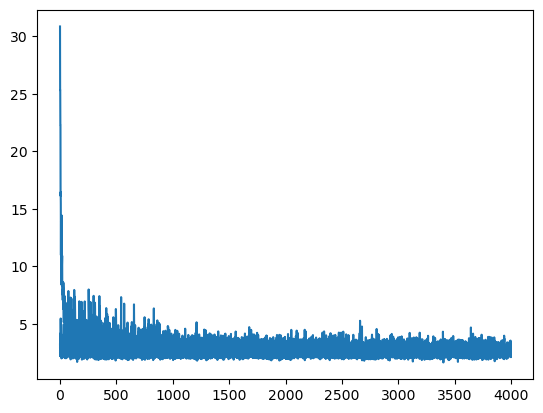

In [183]:
#training loss on a batch
for i in range(4000):
    #mini batching
    ix = torch.randint(0, xtr.shape[0], (32,)) # this takes (32,0) numbers from 0 to 228146 randomly so a vector of 32 numbers as 1 batch

    #forward pass
    embed = lt[xtr[ix]] #input layer
    m = embed.view(-1,6) @ W1 + b1 #hidden layer
    h = torch.tanh(m) #act function
    logit = h @ W2 + b2
    
    #calc loss
    loss = F.cross_entropy(logit, ytr[ix])
    #print(f'loss at iter {i} : {loss:.5f}')

    #calculating gradient
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data += -0.01 * p.grad
    steps.append(i)
    loss_p.append(loss.item())
print(f'loss : {loss.item()}')
plt.plot(steps, loss_p)
plt.show()

In [184]:
#validation loss
embed = lt[xdev] #input layer
m = embed.view(-1,6) @ W1 + b1 #hidden layer
h = torch.tanh(m) #act function
logi = h @ W2 + b2
losse = F.cross_entropy(logi,ydev)
print(losse.item())

2.337822914123535


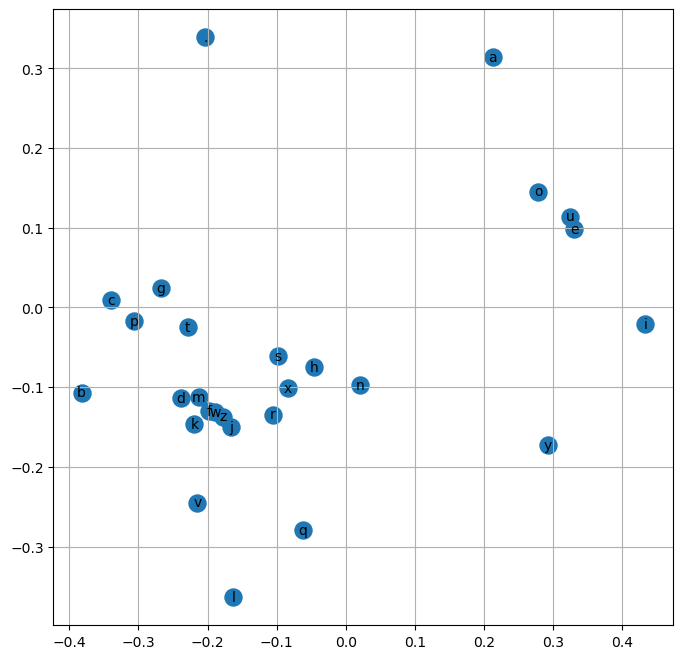

In [129]:
plt.figure(figsize = (8,8))
plt.scatter(lt[:,0].data, lt[:,1].data, s=150)
for i in range(27):
    plt.text(lt[i,0].item(), lt[i,1].item(), itos[i], ha = "center", va = "center")
plt.grid('minor')
plt.show()

In [93]:
lt[:,0].data #takes all rows and first col of the 2 col in the dim table and .data takes the value and not the grad

tensor([-0.5477,  0.1527, -0.1283, -0.1863, -0.0955,  0.3300, -0.0781, -0.0640,
        -0.0070,  0.3690, -0.1691, -0.1313, -0.0459, -0.1112,  0.0822,  0.2689,
        -0.1937, -0.7895, -0.0702, -0.1482, -0.1431,  0.0023, -0.1907,  0.0157,
        -0.0815,  0.3595, -0.0921])

In [98]:
lt[0,0].item()

-0.5477363467216492

In [99]:
lt[0,1].item()

0.6373268961906433

In [197]:
lt.shape

torch.Size([27, 2])

In [203]:
#sampling 
g = torch.Generator().manual_seed(80083)
for i in range(20):
    out = []
    cont = [0] * 3
    while True:
        embed = lt[torch.tensor(cont)]
        li = embed.view(-1,6) @ W1 + b1
        h1 = torch.tanh(li)
        thi = h1 @ W2 + b2
        probs = F.softmax(thi, dim=1)
        samp = torch.multinomial(probs, num_samples = 1, replacement = True, generator = g).item()
        cont = cont[1:] + [samp]
        out.append(samp)
        if samp == 0:
            break
    b = ''.join(itos[i] for i in out)
    print(b)
    

azian.
asulit.
evlynne.
can.
kisa.
claya.
emen.
han.
evyswedsesta.
syaon.
mavlawald.
remsen.
sarae.
ovwan.
zaryan.
eus.
rais.
memsey.
kay.
breselanian.


In [202]:
context = [0] * 3
context[1:] + [2]

[0, 0, 2]